In [37]:
#Import modules
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

In [38]:
# Set the scenario
Typ = ["simple", "simple_I0", "meta"][1]
siz = ["10", "100", "1000"][:]
beta_controls = np.arange(0,1.1,0.1)

In [39]:
#get pickle
plot_dict = {}
ex_dict ={}
ex_dict["10"] = []
ex_dict["100"] = []
ex_dict["1000"] = []
for i in siz:
    with open(f"../../../../Data/R0_3/Sims_SIR/Pickles/Sim_dict_{Typ}_{i}c1.pickle", 'rb') as handle:
        out_dict = pickle.load(handle)
    plot_dict[f"Size_{i}"] = out_dict
    for j in range(len(beta_controls)):
        print(f" The Proportions of extinctions for N={i}:{sum(out_dict[f'Control={j}']['Extinction'])/1000}")
        ex_dict[f'{i}'].append(sum(out_dict[f'Control={j}']['Extinction'])/1000)


 The Proportions of extinctions for N=10:1.0
 The Proportions of extinctions for N=10:0.823
 The Proportions of extinctions for N=10:0.7
 The Proportions of extinctions for N=10:0.577
 The Proportions of extinctions for N=10:0.532
 The Proportions of extinctions for N=10:0.468
 The Proportions of extinctions for N=10:0.447
 The Proportions of extinctions for N=10:0.402
 The Proportions of extinctions for N=10:0.365
 The Proportions of extinctions for N=10:0.361
 The Proportions of extinctions for N=10:0.337
 The Proportions of extinctions for N=100:1.0
 The Proportions of extinctions for N=100:1.0
 The Proportions of extinctions for N=100:0.989
 The Proportions of extinctions for N=100:0.933
 The Proportions of extinctions for N=100:0.825
 The Proportions of extinctions for N=100:0.724
 The Proportions of extinctions for N=100:0.634
 The Proportions of extinctions for N=100:0.525
 The Proportions of extinctions for N=100:0.446
 The Proportions of extinctions for N=100:0.421
 The Propor

C:\Users\ollie\AppData\Local\Temp\ipykernel_18912\2636621240.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


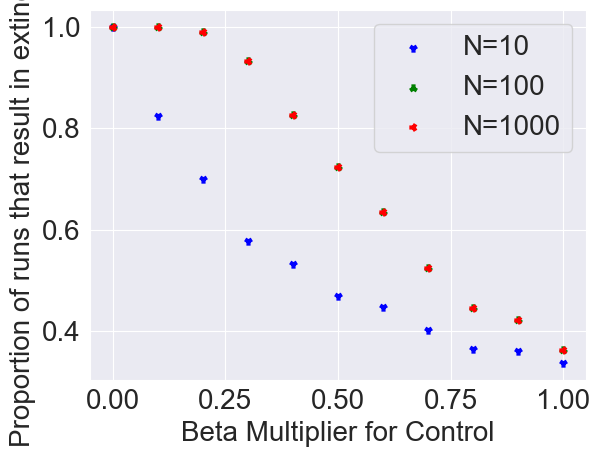

In [40]:
fig, ax0 = plt.subplots()
ax0.scatter(beta_controls,ex_dict["10"], color="b",label = "N=10", marker ="1",linewidths=3)
ax0.scatter(beta_controls,ex_dict["100"], color="g",label = "N=100", marker ="2",linewidths=3)
ax0.scatter(beta_controls,ex_dict["100"], color="r",label = "N=1000",marker="3",linewidths=3)
ax0.set_xlabel("Beta Multiplier for Control")
ax0.set_ylabel("Proportion of runs that result in extinction")
ax0.legend()
fig.show()

In [41]:
if Typ != "meta":
    df = pd.DataFrame(columns=["N","Final_size", "Tmax","Peak","Tpeak", "Control"])
    counter = 0
    vars = ["Final_size", "Tmax","Peak","Tpeak"]
    for k in siz:
        for j in range(len(beta_controls)):
            for i in range(len(plot_dict[f"Size_{k}"][f'Control={j}']['Extinction'])):
                for w in vars:
                    if w in ["Final_size", "Peak"]:
                        df.loc[counter,w] = (plot_dict[f"Size_{k}"][f"Control={j}"][w][i])/int(k)
                    else:
                         df.loc[counter,w] = (plot_dict[f"Size_{k}"][f"Control={j}"][w][i])

                df.loc[counter,"Control"] = f"{round(beta_controls[j],2)}"
                df.loc[counter,"N"] = f"{k}"
                counter +=1
print(df)

          N Final_size       Tmax   Peak     Tpeak Control
0        10        0.1   2.395189    0.1       0.0     0.0
1        10        0.1   1.009373    0.1       0.0     0.0
2        10        0.1   1.027739    0.1       0.0     0.0
3        10        0.1   0.120103    0.1       0.0     0.0
4        10        0.1   0.857431    0.1       0.0     0.0
...     ...        ...        ...    ...       ...     ...
32995  1000      0.954  10.356297  0.371  2.543258     1.0
32996  1000      0.936  12.519146   0.34  3.619217     1.0
32997  1000      0.001   0.124613  0.001       0.0     1.0
32998  1000      0.923  11.032771  0.288  3.932184     1.0
32999  1000      0.915  10.492685  0.307   3.44285     1.0

[33000 rows x 6 columns]


C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

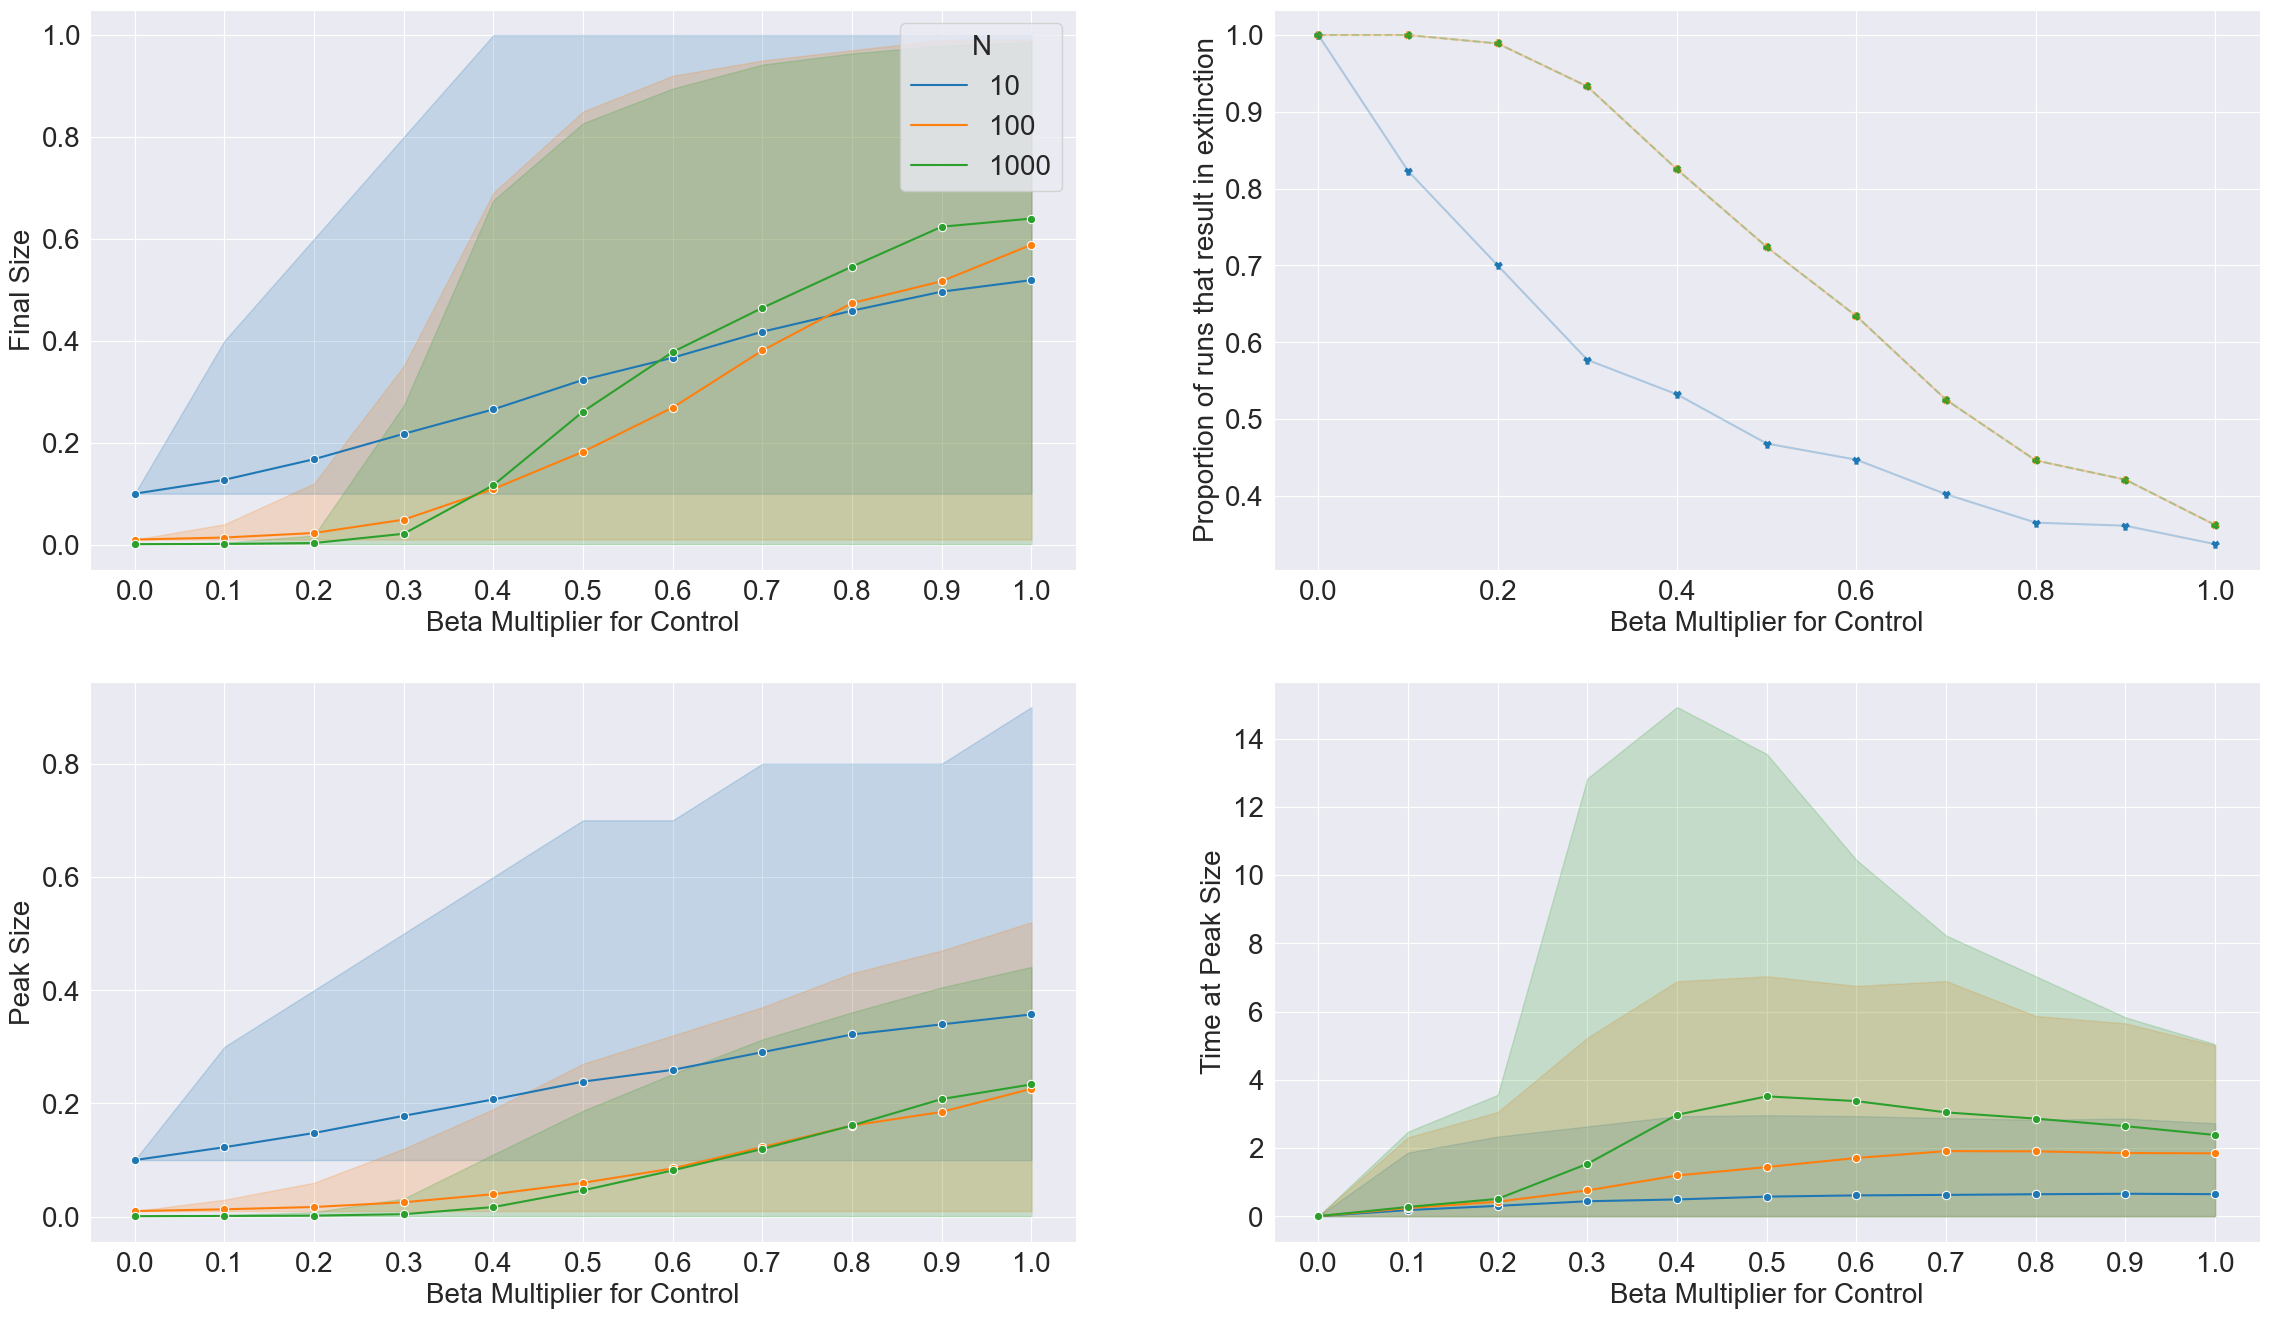

In [42]:
if Typ != "meta":
    fig, ax0 = plt.subplots(figsize = (28,16), nrows=2,ncols=2)
    #sns.set_context('paper', font_scale=2.4)
    # creating a dictionary
    font = {'size': 20}
    # using rc function
    plt.rc('font', **font)
    ax0 = ax0.flatten()
    vars = ["Final_size", "Extinction","Peak","Tpeak"]
    counter = 0
    for w in vars:
        if counter == 0:
            sns.lineplot(data=df, x = "Control", y = w, hue = "N", ax =ax0[counter],errorbar=("pi",95),err_style = "band",legend=True,marker="o")
            ax0[counter].set_xlabel("Beta Multiplier for Control")
            ax0[counter].set_ylabel("Final Size")
        elif w=="Extinction":
            ax0[counter].scatter(beta_controls,ex_dict["10"],label = "N=10", marker ="1",linewidths=3)
            ax0[counter].scatter(beta_controls,ex_dict["100"],label = "N=100", marker ="2",linewidths=3)
            ax0[counter].scatter(beta_controls,ex_dict["100"],label = "N=1000",marker="3",linewidths=3)
            ax0[counter].plot(beta_controls,ex_dict["10"],label = "N=10", alpha = 0.3)
            ax0[counter].plot(beta_controls,ex_dict["100"],label = "N=100",alpha=0.3)
            ax0[counter].plot(beta_controls,ex_dict["100"],label = "N=1000",alpha=0.3,linestyle = "--")
            ax0[counter].set_xlabel("Beta Multiplier for Control")
            ax0[counter].set_ylabel("Proportion of runs that result in extinction")
        else:
            sns.lineplot(data=df, x = "Control", y = w, hue = "N", ax =ax0[counter],errorbar=("pi",95),err_style = "band",marker="o")

            ax0[counter].get_legend().remove()
            ax0[counter].set_xlabel("Beta Multiplier for Control")
            ax0[counter].set_ylabel(f"{['Peak Size', 'Time at Peak Size'][counter-2]}")
        counter +=1
    fig.show()

In [43]:
if Typ == "!meta":
    df = pd.DataFrame(columns=["N","Node","Final_size","Peak","Tpeak", "Control"])
    counter = 0
    vars = ["Final_size","Peak","Tpeak"]
    nodes = np.arange(1,5,1)
    for k in siz:
        for j in range(len(beta_controls)):
            for i in range(0,1000):
                for n in nodes:
                    for w in vars:
                        if w in ["Final_size", "Peak"]:
                            df.loc[counter,w] = (plot_dict[f"Size_{k}"][f"Control={j}"][w][f"Node{n}"][i])/int(k)
                        else:
                             df.loc[counter,w] = (plot_dict[f"Size_{k}"][f"Control={j}"][w][f"Node{n}"][i])

                    df.loc[counter,"Control"] = f"{round(beta_controls[j],2)}"
                    df.loc[counter,"N"] = f"{k}"
                    df.loc[counter,"Node"] = f"{n}"
                    counter +=1
print(df)

          N Final_size       Tmax   Peak     Tpeak Control
0        10        0.1   2.395189    0.1       0.0     0.0
1        10        0.1   1.009373    0.1       0.0     0.0
2        10        0.1   1.027739    0.1       0.0     0.0
3        10        0.1   0.120103    0.1       0.0     0.0
4        10        0.1   0.857431    0.1       0.0     0.0
...     ...        ...        ...    ...       ...     ...
32995  1000      0.954  10.356297  0.371  2.543258     1.0
32996  1000      0.936  12.519146   0.34  3.619217     1.0
32997  1000      0.001   0.124613  0.001       0.0     1.0
32998  1000      0.923  11.032771  0.288  3.932184     1.0
32999  1000      0.915  10.492685  0.307   3.44285     1.0

[33000 rows x 6 columns]


In [44]:
if Typ == "!meta":
    dfT = pd.DataFrame(columns=["N", "Tmax","Control"])
    counter = 0
    vars = ["Tmax"]
    for k in siz:
        for j in range(len(beta_controls)):
            for i in range(0,1000):
                for w in vars:
                    dfT.loc[counter,w] = (plot_dict[f"Size_{k}"][f"Control={j}"][w][i])

                dfT.loc[counter,"Control"] = f"{round(beta_controls[j],2)}"
                dfT.loc[counter,"N"] = f"{k}"
                counter +=1
    print(dfT)

In [45]:
if Typ == "meta":
    fig, ax0 = plt.subplots(figsize = (28,16), nrows=2,ncols=2)
    #sns.set_context('paper', font_scale=2.4)
    # creating a dictionary
    font = {'size': 20}
    # using rc function
    plt.rc('font', **font)
    ax0 = ax0.flatten()
    vars = ["Final_size", "Extinction","Peak","Tpeak"]
    df = pd.read_csv("METABETA.csv")
    df.drop(df.columns[[0]], axis=1, inplace=True)
    print(df)
    df['N'] = df['N'].astype(str)
    counter = 0
    for w in vars:
        if counter == 0:

            sns.lineplot(data=df, x = "Control", y = w, hue = "N", ax =ax0[counter],errorbar=("pi",95),err_style = "band",marker="o",legend=True)
            ax0[counter].set_xlabel("Beta Multiplier for Control")
            ax0[counter].set_ylabel("Final Size")
        elif w=="Extinction":
            ax0[counter].scatter(beta_controls,ex_dict["10"],label = "N=10", marker ="1",linewidths=3)
            ax0[counter].scatter(beta_controls,ex_dict["100"],label = "N=100", marker ="2",linewidths=3)
            ax0[counter].scatter(beta_controls,ex_dict["100"],label = "N=1000",marker="3",linewidths=3)
            ax0[counter].plot(beta_controls,ex_dict["10"],label = "N=10", alpha = 0.3)
            ax0[counter].plot(beta_controls,ex_dict["100"],label = "N=100",alpha=0.3)
            ax0[counter].plot(beta_controls,ex_dict["100"],label = "N=1000",alpha=0.3,linestyle = "--")
            ax0[counter].set_xlabel("Beta Multiplier for Control")
            ax0[counter].set_ylabel("Proportion of runs that result in extinction")
        else:
            sns.lineplot(data=df, x = "Control", y = w, hue = "N", ax =ax0[counter],errorbar=("pi",95),err_style = "band",marker="o")
            ax0[counter].get_legend().remove()
            ax0[counter].set_xlabel("Beta Multiplier for Control")
            ax0[counter].set_ylabel(f"{['Peak Size', 'Time at Peak Size'][counter-2]}")
        counter +=1
    fig.show()